Review of linear regression

In this exercise, we consider the GDP dataset

In [78]:
# import datasets using  pandas
import pandas as pd
GDP=pd.read_excel('../../GDP.xls')
GDP.head()

,Year,GDP,GDPRealRate,Labor,Kapital,KR,Technology,Energy,HR,CPI
0,1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1952,679.000000,NaN,20729.0,80.7,1.000,NaN,NaN,11.03,1.026667
4,1953,824.189657,1.15616,21364.0,115.3,1.446,0.56,5411.0,19.25,1.051082


处理数据集的缺失值

In [79]:
# 具有缺失值
print(GDP.describe())
print(GDP.info())
GDP.isnull().sum()#存在空值
GDP[GDP.isnull().sum(axis=1)>0].index#存在空值的行
GDP=GDP.dropna(how='any')#删掉存在空值的行
GDP=GDP.reset_index(drop=True)

Year            GDP  GDPRealRate         Labor        Kapital  \
count    62.000000      59.000000    58.000000     59.000000      59.000000   
mean   1979.500000   51334.151867     1.084825  48088.525424   20114.718644   
std      18.041619   91796.938647     0.073258  19373.124477   39413.756493   
min    1949.000000     679.000000     0.726774  20729.000000      80.700000   
25%    1964.250000    1755.222918     1.071804  30309.500000     406.850000   
50%    1979.500000    4891.561062     1.091966  43725.000000    1339.300000   
75%    1994.750000   65985.160433     1.116483  68507.500000   22466.550000   
max    2010.000000  401202.028408     1.212547  76105.000000  182340.400000   

              KR   Technology         Energy            HR        CPI  
count  59.000000    58.000000      58.000000     59.000000  59.000000  
mean    1.126559   374.744655   90539.086207   1363.242206   1.034787  
std     0.181095   689.904744   83369.009035   2778.173900   0.057781  
min     0.4900

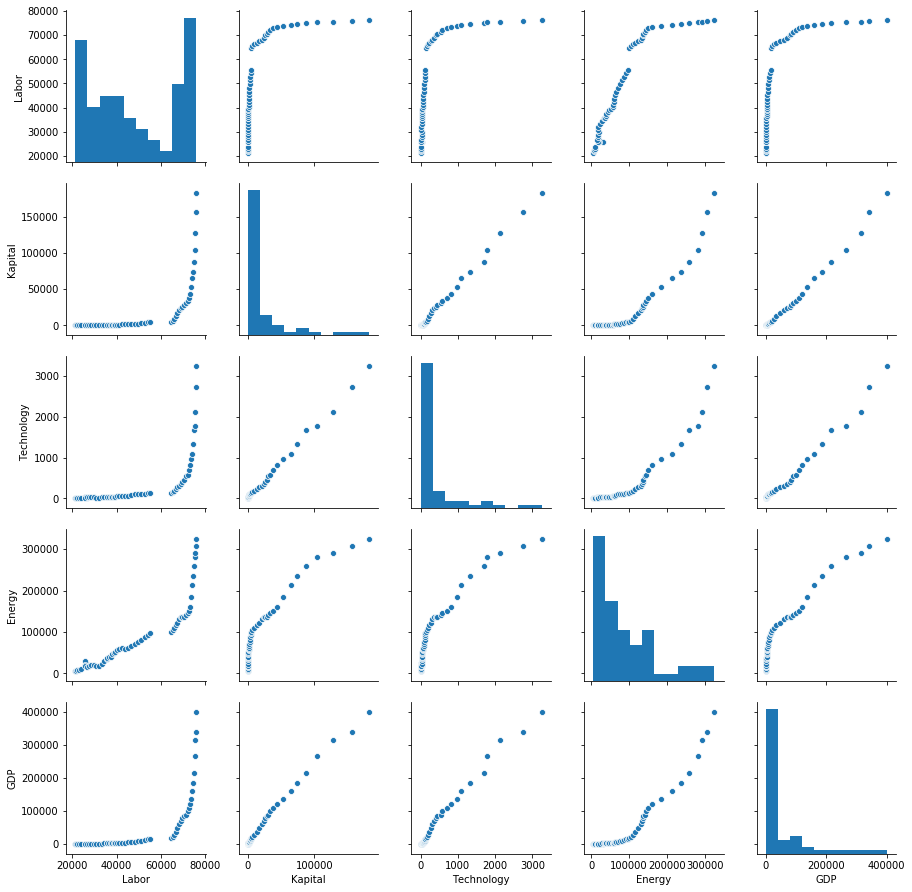

In [80]:
import seaborn as sns
GDP=GDP[['Labor','Kapital','Technology','Energy','GDP']]
sns.pairplot(GDP)

划分训练集和测试集

In [81]:
from sklearn.model_selection import train_test_split
y=GDP.GDP
X=GDP[['Labor','Kapital','Technology','Energy']]
X_train,X_tesy,y_train,y_test=train_test_split(X,y,random_state=1)

用sklearn.linear_model训练模型

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

获得模型系数

In [83]:
zipped=zip(X.columns,model.coef_)
list(zipped)

[('Labor', -0.29719718170509624),
 ('Kapital', 3.086687445914054),
 ('Technology', -75.95588322608937),
 ('Energy', 0.3309719117280205)]

获得模型截距项

In [84]:
model.intercept_

2223.1677847156097

模型检验

In [85]:
y_pre=model.predict(X_tesy)
print('mean squared error:%.2f' %mean_squared_error(y_test,y_pre))
print('Coefficientofdetermination:%.2f' % r2_score(y_test, y_pre))
print('score:%.2f' % model.score(X_tesy,y_test))

mean squared error:45703814.41
Coefficientofdetermination:0.98
score:0.98


In [86]:
y_train_pred=model.predict(X_train)

In [93]:
GDP_TRAIN_PRED=pd.DataFrame(pd.concat([X_train,pd.Series(y_train_pred)],axis=1))
GDP_TRAIN_PRED.rename(columns={0:'GDP_PRED'},inplace=True)

,Labor,Kapital,Technology,Energy,GDP_PRED
0,21364.0,115.3,0.56,5411.0,-1290.900566
1,21832.0,140.9,1.22,6234.0,132150.095836
2,NaN,NaN,NaN,NaN,8249.900294
3,NaN,NaN,NaN,NaN,258102.708489
4,23771.0,187.0,5.23,9644.0,9591.082618
5,26600.0,333.0,11.24,17599.0,55861.959492
6,26173.0,435.7,19.15,23926.0,89711.741319
7,25880.0,473.0,33.81,30188.0,8758.774931
8,25590.0,227.6,19.49,20390.0,81172.452547
9,25910.0,175.1,13.73,16540.0,356337.974763


C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


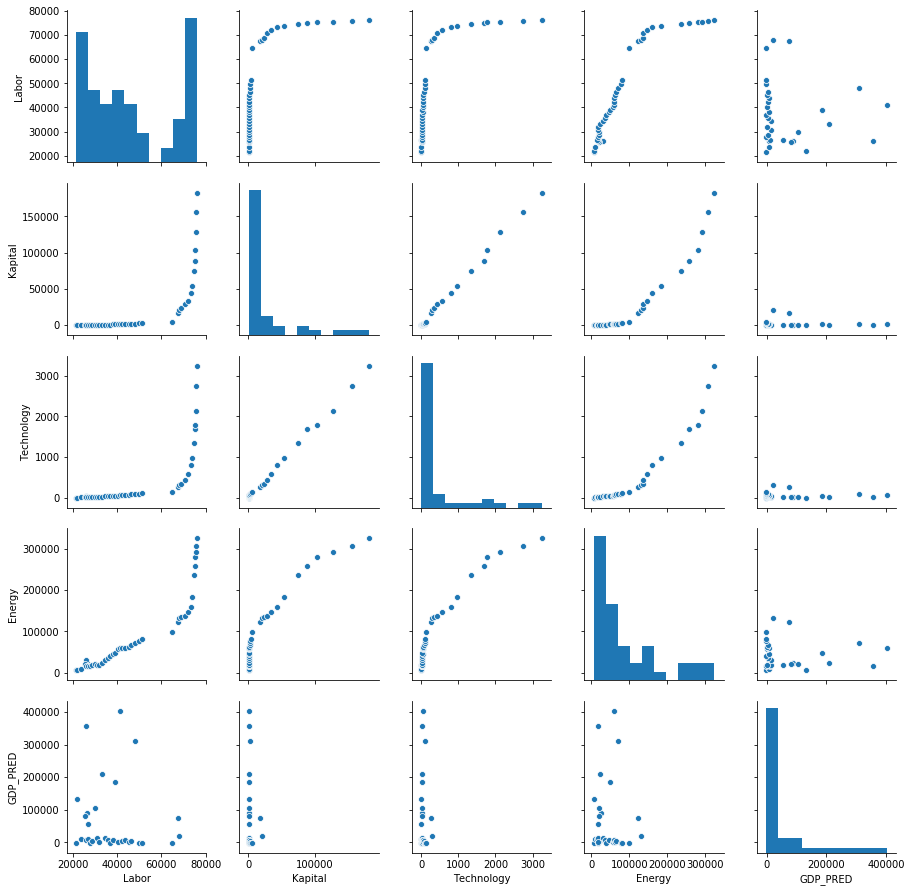

In [94]:
sns.pairplot(GDP_TRAIN_PRED)

模型系数检验

In [0]:
import numpy as np
mean=np.mean(y_train)

model_resid=y_train-y_train_pred
ESS=sum(model_resid**2)
TSS=sum((y_train-mean)**2)#总平方和
RSS=sum((y_train_pred-mean)**2)#回归平方和
Rsquare=RSS/TSS
n=len(Y)
MST = TSS/(n-1)
MSR = RSS/(4) #回归均方误差
MSE = ESS/(n-4-1) #残差均方误差
Rsquare_adj=1-MSE/MST #调整的决定系数

In [0]:
p=4
F=MSR/MSE
from scipy.stats import f
f.ppf(0.95,4,53)#计算分位数
print(1-f.cdf(F,4,53))#计算p值